<a href="https://colab.research.google.com/github/DeanPhillipsOKC/keras-notes/blob/master/Keras_Regression_Based_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Keras Regression Based Project

## Exploratory Data Analysis

### Import the data from GitHub

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/DeanPhillipsOKC/machine-learning-samle-data/master/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### See if we are missing some data points

basically just going to sum the nulls.  There are no missing data points in this case

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Analyse the statistical summary of the table columns

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Visualize the table data

In this example we'll do a quick scatterplot of the price.

The x axis represents the price.
The y axis represents the KDE (Kernel Density Estimation)

One thing worth noting is that there are some outliers that make the graph kind of hard to read

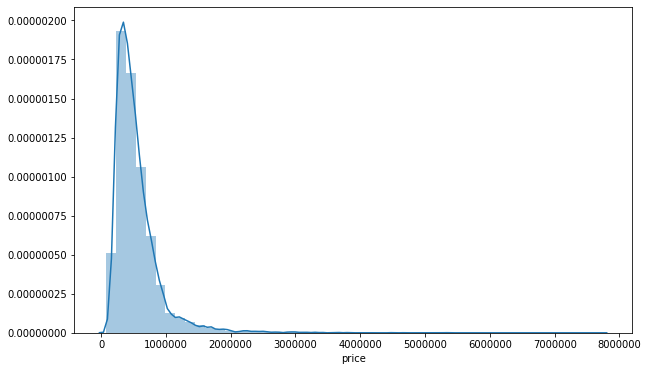

In [8]:
plt.figure(figsize=(10, 6))
sns.distplot(df['price'])

For categorical data, a countplot can be useful.  Even though the number of bedrooms is technically continous there are very few values, and they are discrete, so should treat it as categorical

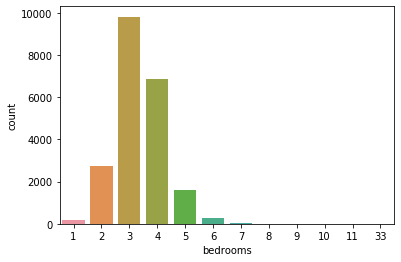

In [9]:
sns.countplot(df['bedrooms'])

### Finding corollaries

In the data below, we are looking for fields that corrolate strongly with the price.

The strongest correlation appears to beh the square footage of the house's livingspace

In [13]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

We can visualize the apprent strong correlation between the price and square footage by making a quick scatterplot

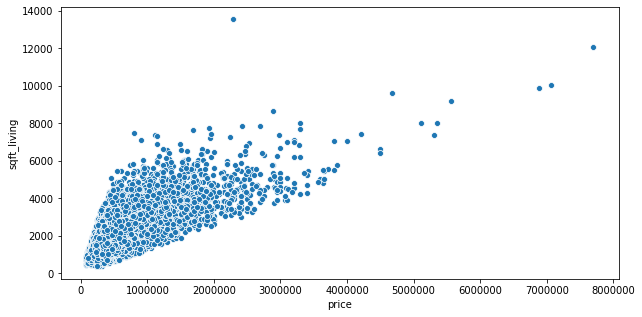

In [15]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='price', y='sqft_living', data=df)

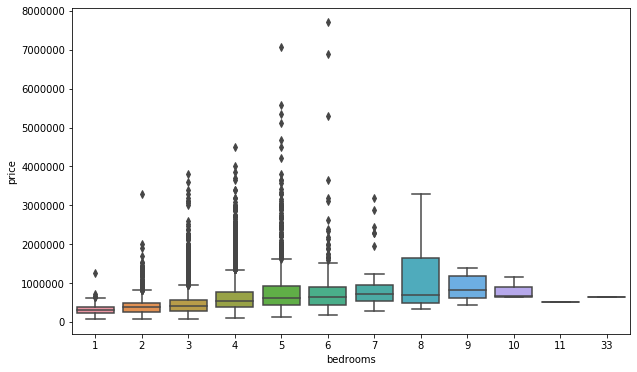

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=df)

In [18]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Further explorartory data analysis by comparing price to latitude and longitude

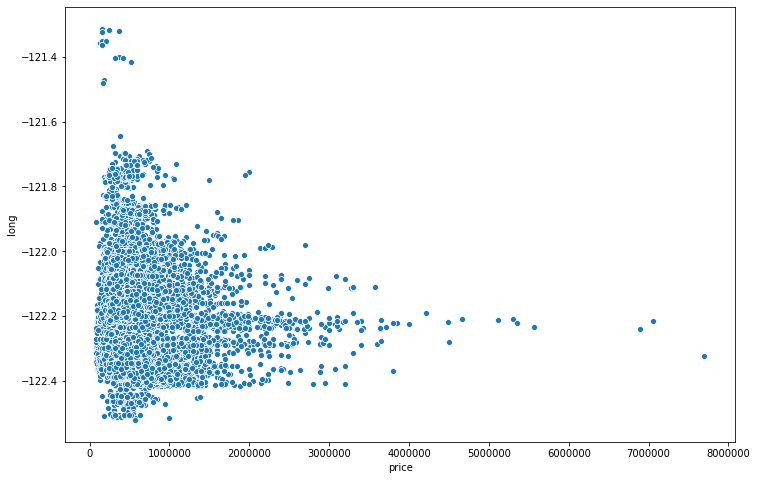

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='long', data=df)

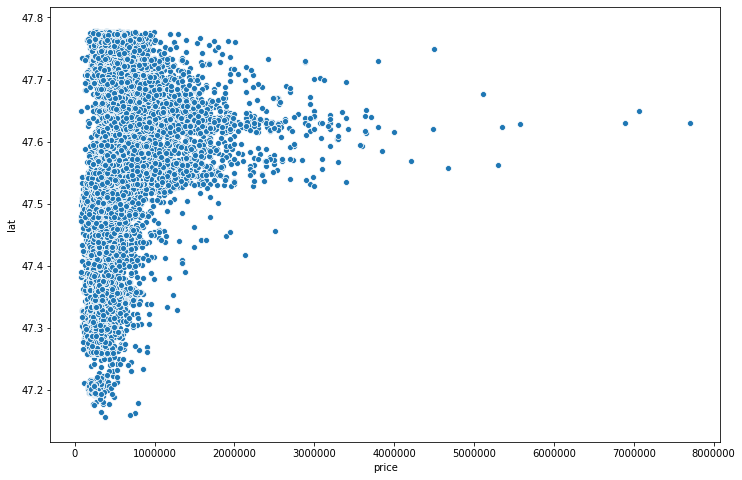

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='lat', data=df)

Examining the lat / long vs price scatterplots above, you can see that there appears to be a pretty affluent neighborhood around lat 47.62 and long -122.21

We can get a more complete picture by creating a scatterplot of lat vs long and adding price as a hue.

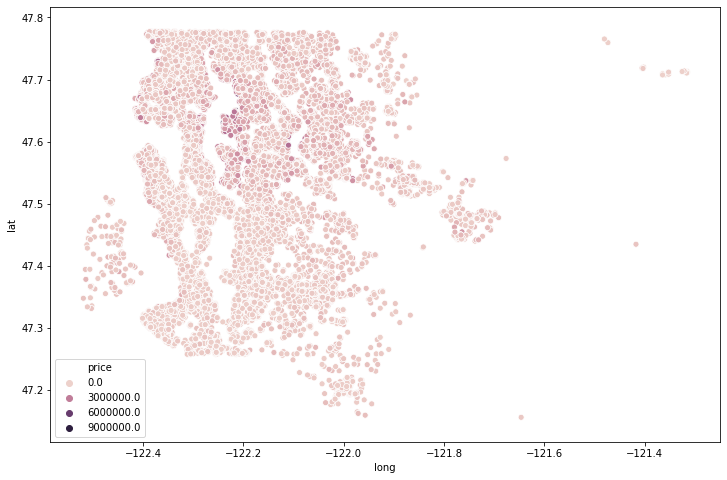

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

Here is a map of kind county WA.  You can see that the scatterplot of lat / long looks a lot like the county map

![alt text](https://www.kingcounty.gov/~/media/operations/GIS/maps/vmc/images/zipcodes_586.ashx?la=en)

Lets try to clean things up a bit by getting rid of the most expensive outliers.  The quickest and easiest way to do this will be to just chop off the top 1% (though std deviations would probably be better)

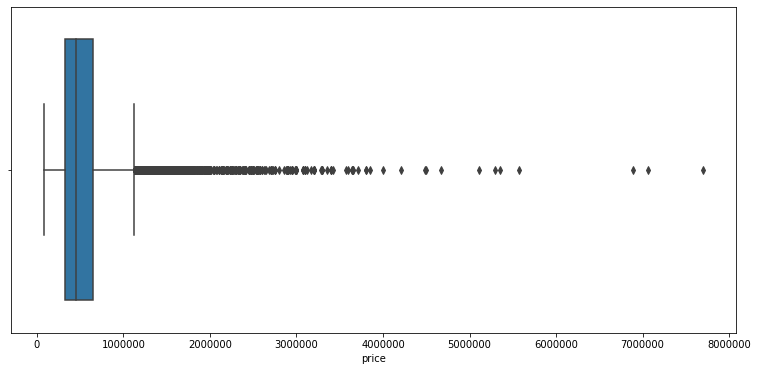

In [29]:
plt.figure(figsize=(13, 6))
sns.boxplot(x=df['price'])

Get rid of outliers the quick and dirty way by just chopping the top 1% most expensive homes.

In [0]:
non_top_1_pct = df.sort_values('price', ascending=False).iloc[216:]

Graph it!

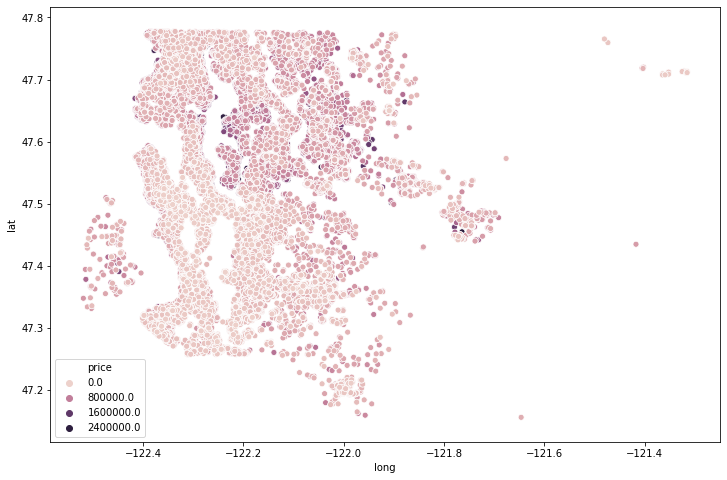

In [42]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=non_top_1_pct, hue='price')

That is a little hard to read, so lets get rid of the edge color

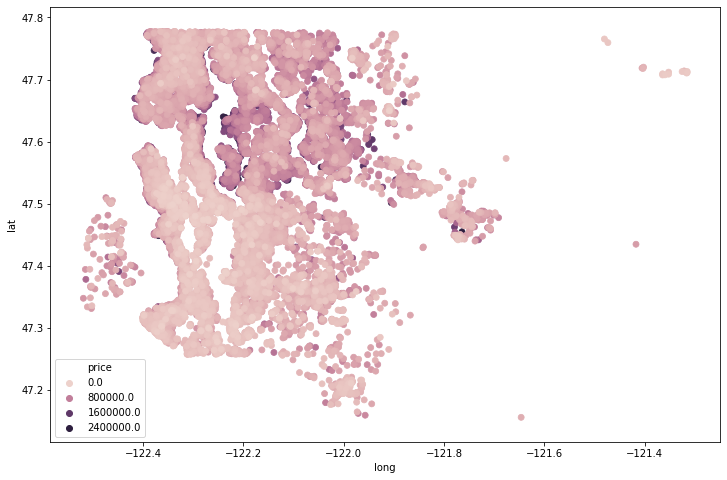

In [43]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', edgecolor=None, data=non_top_1_pct, hue='price')

Better, but lets set the alpha to 0.2 to help make the overlapping data points a bit easier to see.

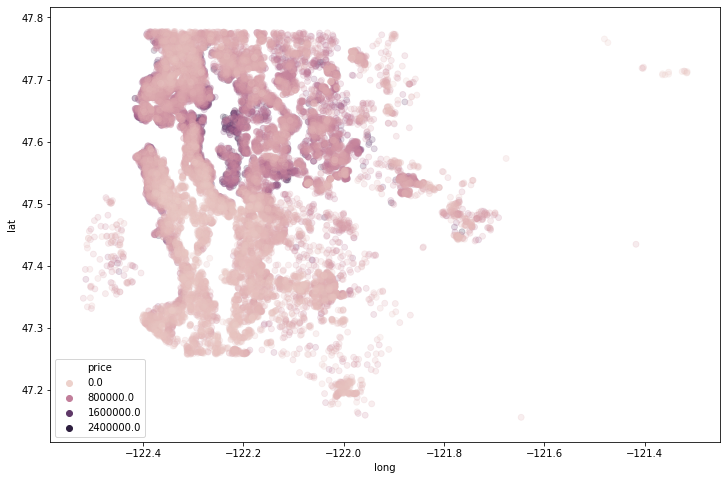

In [45]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', edgecolor=None, alpha=0.2, data=non_top_1_pct, hue='price')

Almost there.  Lets choose a red, yellow, green pallete to make the colors stand out a bit more

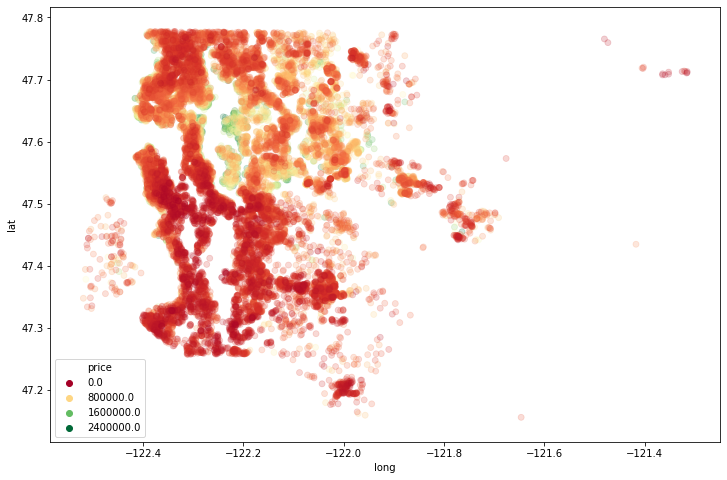

In [40]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', edgecolor=None, alpha=0.2, palette='RdYlGn', data=non_top_1_pct, hue='price')

Based on the data bove it looks like most of the expensive homes are in Bellevue, however there do appear to be some pricey spots in cheaper areas that are near the water.

Lets make a quick box plot to show correlation between price, and whether or not the home is a waterfront property

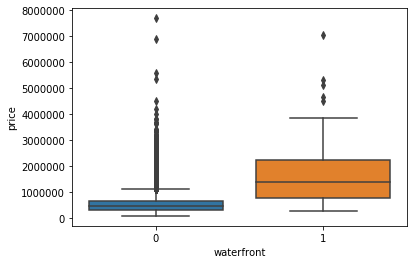

In [47]:
sns.boxplot(x='waterfront', y='price', data=df)

### Get rid of unnecessary data

First thing we can do is get rid of the id column.  It appears to only be a key and has no relevance as a categorical or continous data point.

In [0]:
df = df.drop('id', axis=1)

Next, lets turn out attention to the date.  It appears to be stored as some sort of a string.  It would be far more useful to us if it were stored as a DateTime so that we can access lots of useful stuff like month easily

In [50]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [0]:
df['date'] = pd.to_datetime(df['date'])

In [52]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

Now lets add a year column using our new DateTime value

In [0]:
df['year'] = df['date'].apply(lambda date: date.year)

In [56]:
df['year']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21592    2014
21593    2015
21594    2014
21595    2015
21596    2014
Name: year, Length: 21597, dtype: int64

Same thing for month

In [58]:
df['month'] = df['date'].apply(lambda date: date.month)
df['month']

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: month, Length: 21597, dtype: int64

Do some quick analysis to see if the month has an impact on price

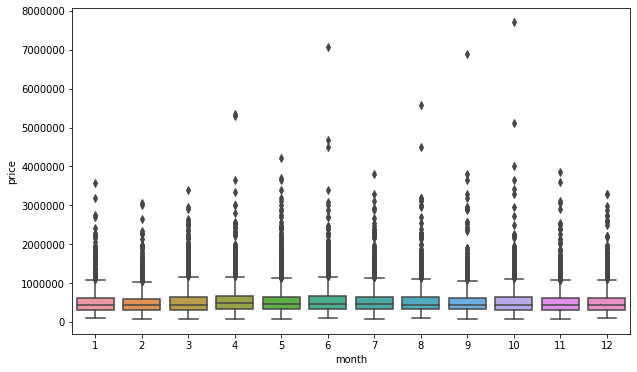

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='price', data=df)

Another way to visualize it.  There *might* be something to it, but keep the y axis scale in mind.  There's only about a 50k difference between the lowest and highest values which isn't terribly significant given the mean.

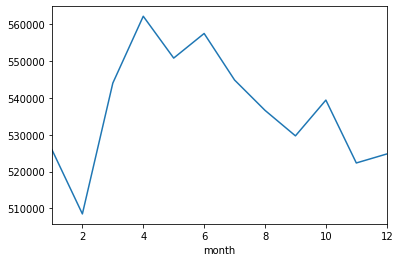

In [61]:
df.groupby('month').mean()['price'].plot()

Now, lets do a bit of analysis using the year.  Home prices in King County definitely appear to be rising at a linear rate (probably inline with iflation provided there are not major market disruptions)

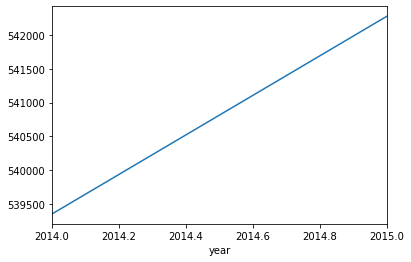

In [62]:
df.groupby('year').mean()['price'].plot()

Now that we've feature engineered our date column, we can go ahead and drop the original as we don't really have much use for it anymore

In [0]:
df = df.drop('date', axis=1)

Take another look at our columns.  These columsn look good with at least one caveat.  The zip code is numeric which could cause problems with our model since zip codes are really more categorical.

In [65]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


Before deciding whether to make zip code a category, lets do a quick value_counts call to see how many unique values there are.

Turns, out there are about 70 which is a little big for categorical data so we are going to go ahead and drop it.

There are viable alternatives such as partitioning the zip codes into N, S, E, W quartiles, but to keep things simple lets just get rid of it

In [66]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [0]:
df = df.drop('zipcode', axis=1)

In [68]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


Another column that is potentially worth feature engineering is 'yr_renovated'.

Most rows have a yr_renovated column value of zero meaning the house was not renovated.

Based on this it may be worth converting this data into a binary category (was renovated, or was not renovated)

In [69]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [0]:
df['was_renovated'] = df['yr_renovated'].apply(lambda yr: yr > 0)

In [71]:
df['was_renovated'].value_counts()

False    20683
True       914
Name: was_renovated, dtype: int64

The was_renovated column seemed like a good idea, but if you think about it, this column didn't really need work.  If you think of the year as a continuous value, then higher values would be more valuable (in other words the higher the year the more recent the renovation).  The values of zero still fit this model because they are the lowest value possible.

Based on this, I am going to go ahead and drop the was_renovated column

In [0]:
df = df.drop('was_renovated', axis=1)

In [73]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
